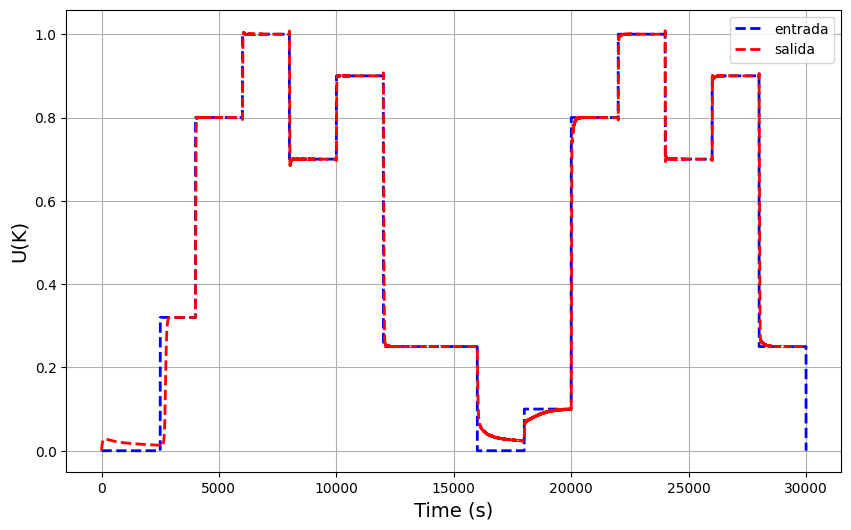

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
from pandas import ExcelWriter

# Parametros de FT
k = 1.6222
tao =0.3699
delta =0.01

# Inicializacion Variables = Tiempo, Entrada, Salida, Error,control(a la planta)
t = 0
u = 0
y = 0
e = 0
UK = 0

# Error
e_1 = [0,0]
xe2 = 0
xe3 = 0


# Vectores de Graficas
yy = []
uu = []
tt = []

# Coeficientes de ponderación W
w11=[1]
w12=[0]
w13=[0]
w21=[0]
w22=[0]
w23=[0]
w31=[0]
w32=[0]
w33=[0]

# Coeficientes de ponderación V
v1=[-8]
v2=[0]
v3=[0]

# Taza de aprendizaje
alfa= 4
G = 6

# Simulacion
while t<=30000:

    if t>=2500:
         u=32
    if t>=4000:
         u=80
    if t>=6000:
         u=100
    if t>=8000:
         u=70
    if t>=10000:
         u=90
    if t>=12000:
         u=25
    if t>=16000:
         u=0
    if t>=18000:
         u=10
    if t>=20000:
         u=80
    if t>=22000:
         u=100
    if t>=24000:
         u=70
    if t>=26000:
         u=90
    if t>=28000:
         u=25
    if t>=30000:
         u=0

    # Normalizacion U
    umax = 100
    umin = 0
    df = (u - umin) / (umax - umin)

    # Calculo de y(k)
    y = ((((UK * k) - y) * delta) / tao) + y

    # Guardado para Grafica
    uu.append(df)
    yy.append(y)
    tt.append(t)

    t = t + 1 # Aumento Tiempo

    # Control Autoajustable

    e  = df - y
    e_1.append(e)

    # Error y Estados anterios del Error
    xe1 = e
    xe2 = e_1[t-1]
    xe3 = e_1[t-2]

    #  Capa Oculta
    he1=(w11[t-1] * xe1) + (w21[t-1] * xe2) + (w31[t-1] * xe3)
    he1 = 1 / (1 + np.exp(- he1))

    he2=(w21[t-1] * xe1) + (w22[t-1] * xe2) + (w23[t-1] * xe3)
    he2 = 1 / (1 + np.exp(- he2))

    he3=(w31[t-1] * xe1) + (w32[t-1] * xe2) + (w33[t-1] * xe3)
    he3 = 1 / (1 + np.exp(- he3))

    # Capa Salida
    UK= (v1[t-1] * he1) + (v2[t-1] * he2) + (v3[t-1] * he3)
    UK= 1 / (1 + np.exp(-UK))

    # Calculo de ajustes para V
    s= e* UK* (1-UK)

    # Calculo coeficientes de ponderación V
    v_1 = v1[t-2] + (alfa * s * he1)
    v1.append(v_1)
    v_2 = v2[t-2] + (alfa * s * he2)
    v2.append(v_2)
    v_3 = v3[t-2] + (alfa * s * he3)
    v3.append(v_3)

    # Calculo de ajustes para Wji
    s1 = s * v1[t-2] * he1 * (1 - he1)
    s2 = s * v2[t-2] * he2 * (1 - he2)
    s3 = s * v3[t-2] * he3 * (1 - he3)

    # Calculo coeficientes de ponderación W
    w_11 = w11[t-2] + (alfa * s1 * xe1)
    w11.append(w_11)
    w_12 = w12[t-2] + (alfa * s2 * xe2)
    w12.append(w_12)
    w_13 = w13[t-2] + (alfa * s3 * xe3)
    w13.append(w_13)

    w_21 = w21[t-2] + (alfa * s1 * xe1)
    w21.append(w_21)
    w_22 = w22[t-2] + (alfa * s2 * xe2)
    w22.append(w_22)
    w_23 = w23[t-2] + (alfa * s3 * xe3)
    w23.append(w_23)

    w_31 = w31[t-2] + (alfa * s1 * xe1)
    w31.append(w_31)
    w_32 = w32[t-2] + (alfa * s2 * xe2)
    w32.append(w_32)
    w_33 = w33[t-2] + (alfa * s3 * xe3)
    w33.append(w_33)

    # Tasa de aprendizaje
    alfaa = alfa + (G * np.abs(e))




# Grafica
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(tt,uu,'b--',linewidth=2)
plt.plot(tt,yy,'r--',linewidth=2)
plt.legend(['entrada','salida'],loc = "upper right")
plt.ylabel('U(K)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.show()

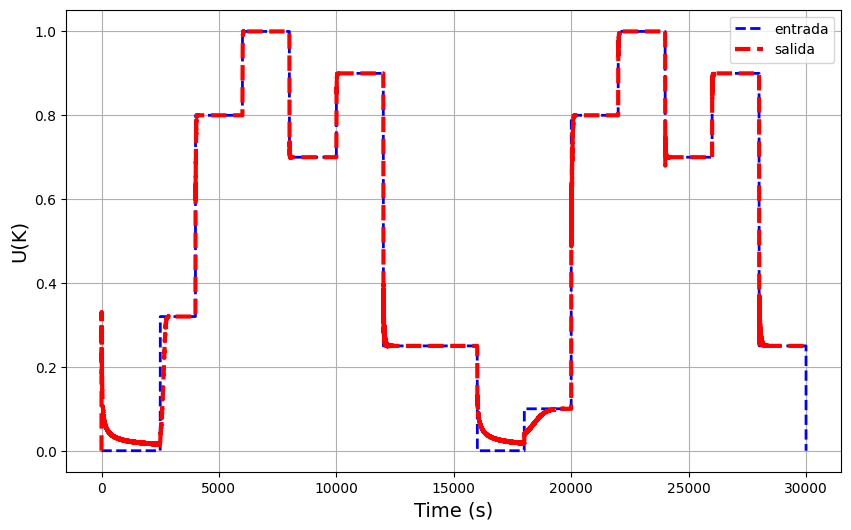

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
from pandas import ExcelWriter

# Parametros de FT
k = 1.6222     # Ganancia
wn = 0.238    # Frecuencia
zita = 0.8  # Amortiguamiento
delta = 4


# Inicializacion Variables = Tiempo, Entrada, Salida, Error, control(a la planta)
t = 0
u = 0
y = 0
e = 0
UK = 0

# Error
e_1 = [0,0]
xe2 = 0
xe3 = 0

# Vectores de Graficas
yy = [0, 0]
uu = [0, 0]
tt = [0, 0]


w11=[-1]
w12=[0]
w13=[0]
w21=[0]
w22=[0]
w23=[0]
w31=[0]
w32=[0]
w33=[0]

# Coeficientes de ponderación Vj
v1=[-2]
v2=[0]
v3=[0]

# Taza de aprendizaje
alfa= 4
G = 0.1

# Simulacion
while t<=30000:

    if t>=2500:
         u=32
    if t>=4000:
         u=80
    if t>=6000:
         u=100
    if t>=8000:
         u=70
    if t>=10000:
         u=90
    if t>=12000:
         u=25
    if t>=16000:
         u=0
    if t>=18000:
         u=10
    if t>=20000:
         u=80
    if t>=22000:
         u=100
    if t>=24000:
         u=70
    if t>=26000:
         u=90
    if t>=28000:
         u=25
    if t>=30000:
         u=0

    # Normalizacion
    umax = 100
    umin = 0
    df = (u - umin) / (umax - umin)


    #Sistema de Segundo Orden
    y = (1 / (1 / (delta**2) + zita * wn / delta)) * (wn**2 * k * UK - (wn**2 - 2 / delta**2) * yy[t-1] - (1 / delta**2 - zita * wn / delta) * yy[t-2])

    # Guardado para Graficar
    uu.append(df)
    yy.append(y)
    tt.append(t)

    t = t + 1

    # Calculpo del Error
    e  = df - y
    e_1.append(e)

    # Estados anterios del Error
    xe1 = e
    xe2 = e_1[t-1]
    xe3 = e_1[t-2]

    #  Capa Oculta
    he1=(w11[t-1] * xe1) + (w21[t-1] * xe2) + (w31[t-1] * xe3)
    he1 = 1 / (1 + np.exp(- he1))

    he2=(w21[t-1] * xe1) + (w22[t-1] * xe2) + (w23[t-1] * xe3)
    he2 = 1 / (1 + np.exp(- he2))

    he3=(w31[t-1] * xe1) + (w32[t-1] * xe2) + (w33[t-1] * xe3)
    he3 = 1 / (1 + np.exp(- he3))

    # Capa Salida
    UK= (v1[t-1] * he1) + (v2[t-1] * he2) + (v3[t-1] * he3)
    UK= 1 / (1 + np.exp(-UK))

    # Calculo de ajustes para V
    s= e* UK* (1-UK)

    # Calculo coeficientes de ponderación V
    v_1 = v1[t-2] + (alfa * s * he1)
    v1.append(v_1)
    v_2 = v2[t-2] + (alfa * s * he2)
    v2.append(v_2)
    v_3 = v3[t-2] + (alfa * s * he3)
    v3.append(v_3)

    # Calculo de ajustes para W
    s1 = s * v1[t-2] * he1 * (1 - he1)
    s2 = s * v2[t-2] * he2 * (1 - he2)
    s3 = s * v3[t-2] * he3 * (1 - he3)

    # Calculo coeficientes de ponderación W
    w_11 = w11[t-2] + (alfa * s1 * xe1)
    w11.append(w_11)
    w_12 = w12[t-2] + (alfa * s2 * xe2)
    w12.append(w_12)
    w_13 = w13[t-2] + (alfa * s3 * xe3)
    w13.append(w_13)

    w_21 = w21[t-2] + (alfa* s1 * xe1)
    w21.append(w_21)
    w_22 = w22[t-2] + (alfa * s2 * xe2)
    w22.append(w_22)
    w_23 = w23[t-2] + (alfa * s3 * xe3)
    w23.append(w_23)

    w_31 = w31[t-2] + (alfa * s1 * xe1)
    w31.append(w_31)
    w_32 = w32[t-2] + (alfa * s2 * xe2)
    w32.append(w_32)
    w_33 = w33[t-2] + (alfa * s3 * xe3)
    w33.append(w_33)

    # Tasa de aprendizaje
    alfaa = alfa + (G* np.abs(e))



# Grafica
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(tt,uu,'b--',linewidth=2) # entrada
plt.plot(tt,yy,'r--',linewidth=3) # salida
plt.legend(['entrada','salida'],loc = "upper right")
plt.ylabel('U(K)',fontsize=14)
plt.xlabel('Time (s)',fontsize=14)
plt.show()